### 1.

a) and b)

[1] -20

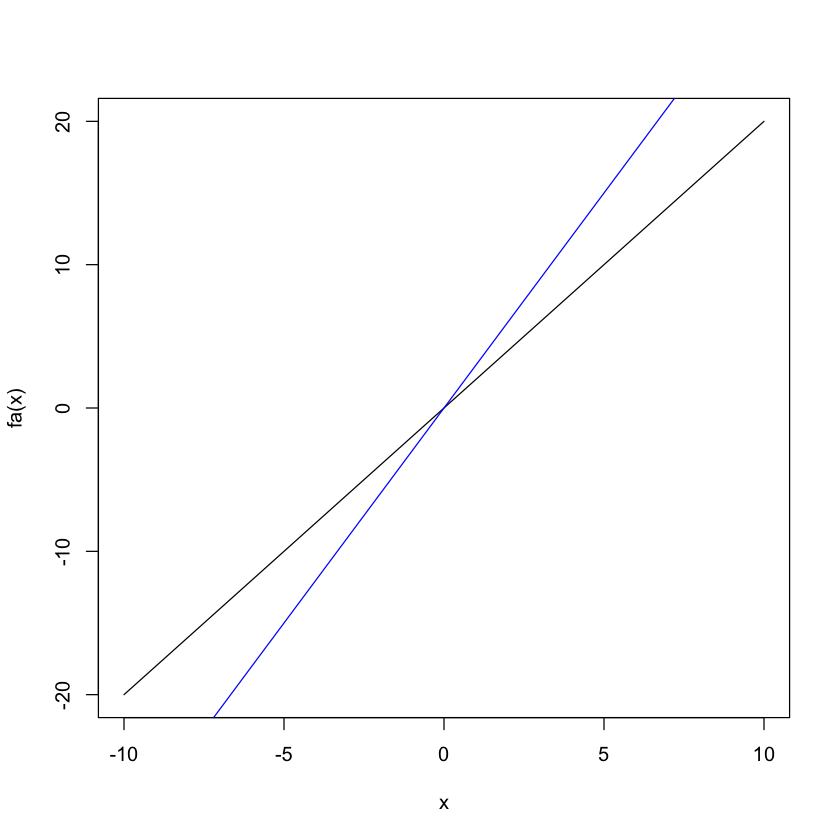

In [23]:
x = -10:10
fa = function(x) { 1 + (3*x) - (x + 1)}
fb = function(x) { -2 + x + 2 * (x + 1)}
plot(x, fa(x), type='l')
points(x, fb(x), type='l', col='blue')

### 4.


Call:
svm(formula = y ~ ., data = dat[train, ], kernel = "linear", cost = 10, 
    scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 

Number of Support Vectors:  19



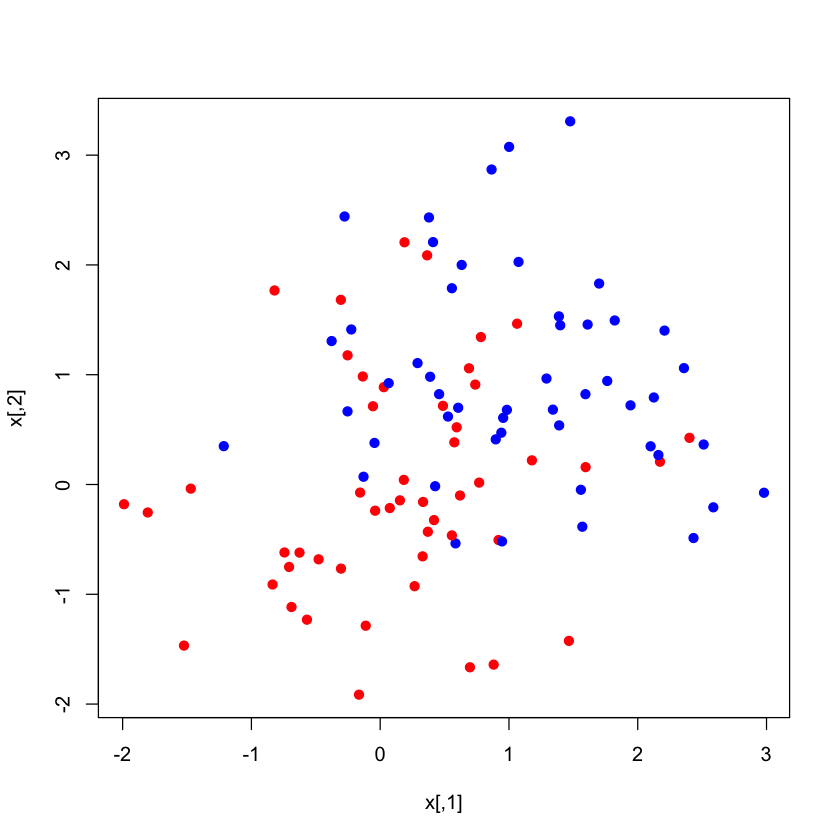

    pred
true -1  1
  -1 15 13
  1   6 16

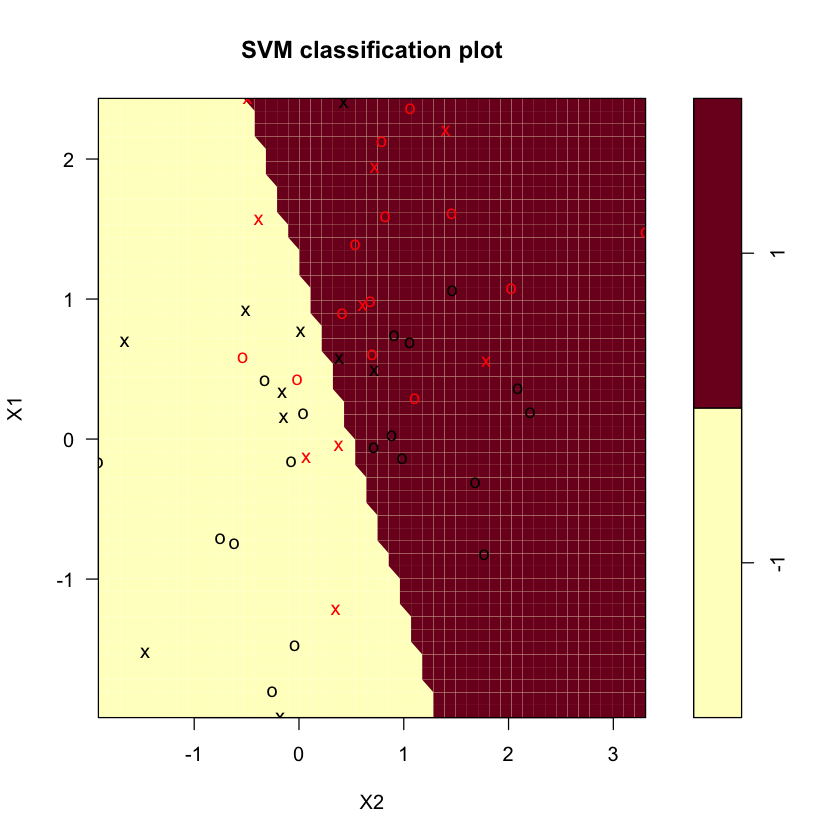

    pred
true -1  1
  -1 12 16
  1   3 19

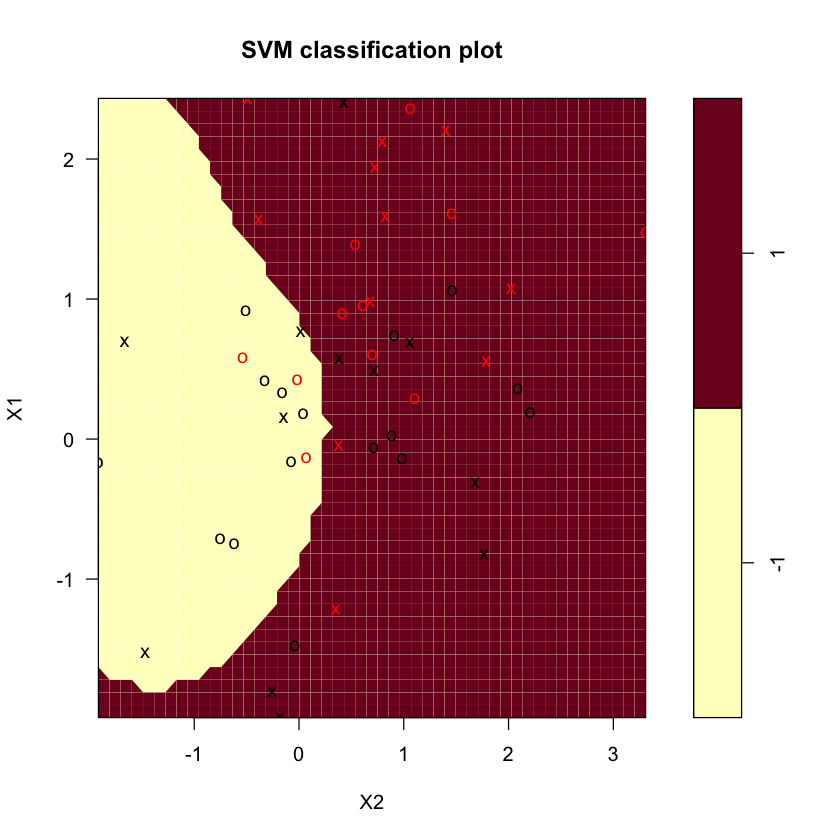

In [52]:
# install.packages('e1071')
set.seed(1)
x = matrix(rnorm(100*2),ncol=2)
train = sample(100, 50)
y = rep(c(-1,1), c(10,10))
x[y==1,] = x[y==1,]+1
plot(x,col = y + 3,pch=19)

library(e1071)

# linear svm (or svc)
dat = data.frame(x, y = as.factor(y))
svcfit = svm(y~., data=dat[train,], kernel='linear', cost=10, scale=FALSE)
print(svcfit)
plot(svcfit, dat[-train,])
table(true=dat[-train,"y"], pred=predict(svcfit, newdata=dat[-train ,]))

# radial SVM
# tune
tune.out = tune(svm, y~., data=dat[train,], kernel="radial",
    ranges=list(
        cost=c(0.1,1,10,100,1000),
        gamma=c(0.5,1,2,3,4)))

#plot(tune.out$best.model, dat[train,])
plot(tune.out$best.model, dat[-train,])

table(true=dat[-train,"y"], pred=predict(tune.out$best.model, newdata=dat[-train ,]))